In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
#import scenarios from result folder
nodal = pd.read_csv('results\optimization_results_marketprices_nodal_angles.csv')
nodal_sensitivity = pd.read_csv('results\optimization_results_marketprices_nodal_angles_sensitivity.csv')
zonal = pd.read_csv('results\optimization_results_marketprices_zonal.csv')
zonal_sensitivity = pd.read_csv('results\optimization_results_marketprices_zonal_sensitivity.csv')

In [74]:
#duplicate for each dataframe th first row and add it in the beginning of the dataframe
nodal.loc[-1] = nodal.loc[0]
nodal.index = nodal.index + 1
nodal = nodal.sort_index()

nodal_sensitivity.loc[-1] = nodal_sensitivity.loc[0]
nodal_sensitivity.index = nodal_sensitivity.index + 1
nodal_sensitivity = nodal_sensitivity.sort_index()

zonal.loc[-1] = zonal.loc[0]
zonal.index = zonal.index + 1
zonal = zonal.sort_index()

zonal_sensitivity.loc[-1] = zonal_sensitivity.loc[0]
zonal_sensitivity.index = zonal_sensitivity.index + 1
zonal_sensitivity = zonal_sensitivity.sort_index()

#change in each dataframe the first hour entry to zero
nodal.loc[0, 'hour'] = 0
nodal_sensitivity.loc[0, 'hour'] = 0
zonal.loc[0, 'hour'] = 0
zonal_sensitivity.loc[0, 'hour'] = 0


In [75]:
zonal_sensitivity

,hour,market_price_zone1,market_price_zone2,market_price_zone3
0,0.0,12.610122,10.52,6.02
1,1.0,12.610122,10.52,6.02
2,2.0,12.610122,10.52,6.02
3,3.0,12.454721,10.52,6.02
4,4.0,12.454721,10.52,6.02
5,5.0,12.454721,10.52,6.02
6,6.0,12.454721,10.52,6.02
7,7.0,12.610122,10.52,6.02
8,8.0,12.610122,10.52,6.02
9,9.0,13.320000,10.89,6.02


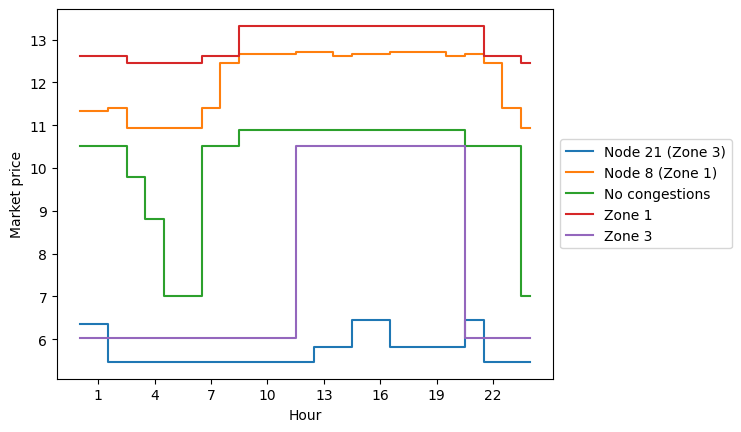

In [76]:
# Create figure and primary axis
fig, ax1 = plt.subplots()

#x ticks should go from 1 to 24
plt.xticks(np.arange(1, 25, 3))

# Plot data on primary axis
ax1.step(nodal['hour'], nodal['market_price_node21'], where='mid', label='Node 21 (Zone 3)')
ax1.step(nodal['hour'], nodal['market_price_node8'], where='mid', label='Node 8 (Zone 1)')
ax1.step(nodal_sensitivity['hour'], nodal_sensitivity['market_price_node17'], where='mid', label='No congestions')
ax1.step(zonal_sensitivity['hour'], zonal_sensitivity['market_price_zone1'], where='mid', label='Zone 1')
ax1.step(zonal_sensitivity['hour'], zonal_sensitivity['market_price_zone3'], where='mid', label='Zone 3')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Market price')  # Y-axis label for the primary axis

#add legend on the side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

#save plot
fig.savefig('results\market_prices_task4.png', bbox_inches='tight')